In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast 

# Read the CSV file
df = pd.read_csv('fids2.csv')
#T_0 = 15
#T_f = 1200
#steps = 200

steps = 250
T_0 = 15
T_f = 950

ts = np.linspace(T_0, T_f, steps)

def find_points_over_threshold(df, ts, threshold=0.9, first_only=True):
    """
    Find points (x, y) where arrays in df exceed a threshold.

    Parameters:
        df (pd.DataFrame): DataFrame with columns 'N' and 'array' (arrays as stringified lists).
        ts (array-like): X-axis array (same length as each array in df['array']).
        threshold (float): Threshold to check against.
        first_only (bool): If True, return only the first point above the threshold.

    Returns:
        dict: {N: (x, y)} or {N: [(x1, y1), (x2, y2), ...]} depending on `first_only`.
    """
    results = {}
    ts = np.asarray(ts)

    for _, row in df.iterrows():
        N = int(row['N'])
        arr = np.array(ast.literal_eval(row['array']))
        
        if len(arr) != len(ts):
            raise ValueError(f"Length mismatch for N={N}: len(ts)={len(ts)}, len(array)={len(arr)}")

        # Find indices where array > threshold
        indices = np.where(arr > threshold)[0]

        if len(indices) > 0:
            if first_only:
                i = indices[0]
                results[N] = (ts[i], arr[i])
            else:
                results[N] = [(ts[i], arr[i]) for i in indices]
        else:
            results[N] = None  # no points above threshold

    return results

points = find_points_over_threshold(df, ts)

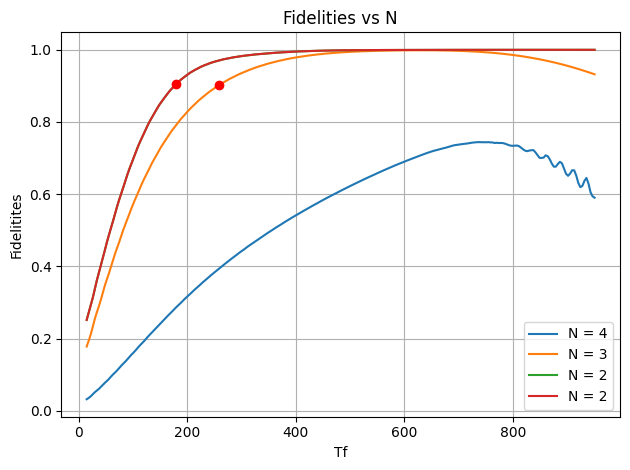

In [2]:

# Loop over each row and plot
for _, row in df.iterrows():
    N = int(row['N'])
    arr = np.array(ast.literal_eval(row['array']))  # convert string -> list -> np.array
    
    plt.plot(ts, arr, label=f'N = {N}')

for point in points:
    p = points[point]
    if p != None:
        plt.plot(p[0], p[1], 'ro')

# Add labels, title, legend, and grid
plt.xlabel('Tf')
plt.ylabel('Fidelitites')
plt.title('Fidelities vs N')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()